In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import librosa.feature
import IPython.display as ipd
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K

In [12]:
y, sr = librosa.load('IRMAS-Sample/Training/sax/118__[sax][nod][jaz_blu]1702__3.wav')

In [13]:
librosa.feature.mfcc(y=y, sr=sr)

array([[-125.079735 , -109.92977  , -125.99776  , ..., -125.49601  ,
        -125.64358  , -126.35509  ],
       [ 103.81346  ,   82.74367  ,   63.13837  , ...,   48.084198 ,
          56.67372  ,   77.33623  ],
       [ -35.305557 ,  -18.324785 ,  -10.276358 , ...,  -12.341202 ,
         -16.483795 ,  -27.621227 ],
       ...,
       [   4.7672167,    5.4596453,    4.0297165, ...,  -11.817475 ,
         -11.405233 ,   -9.316721 ],
       [  -5.6433992,   -7.329232 ,   -6.25332  , ...,   -5.9935794,
          -7.9223824,  -14.00951  ],
       [  15.123335 ,   14.934036 ,   15.468357 , ...,   14.269892 ,
          11.893127 ,    6.901555 ]], dtype=float32)

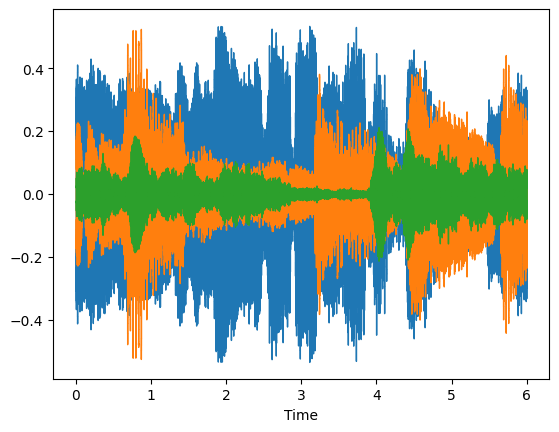

In [35]:
pathAudio = "IRMAS-Sample/Training/"
files = librosa.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)
for y in files: 
    data = librosa.load(y, sr = None,mono = True)   
    data = data[0]     
    librosa.display.waveshow(data)

In [3]:
import os

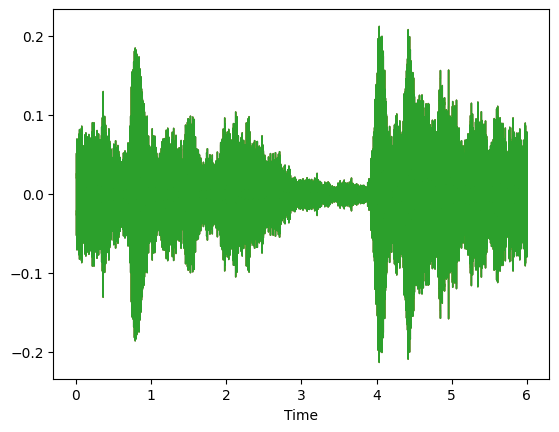

In [36]:
r = []
for root, dirs, files in os.walk('IRMAS-Sample/Training'):
    for name in files:
        r.append(os.path.join(root, name))
        #data = librosa.load(name, sr = None,mono = True)
        #data = data[0]
        librosa.display.waveshow(data)

In [37]:
r

['IRMAS-Sample/Training\\sax\\118__[sax][nod][jaz_blu]1702__3.wav',
 'IRMAS-Sample/Training\\vio\\001__[vio][nod][cou_fol]2194__1.wav',
 'IRMAS-Sample/Training\\vio\\134__[vio][nod][cla]2156__3.wav']

In [ ]:
y = [1,1,0,0,0,0,0,0,0,0,0]*n_samples
if text enthält cel dann y[0] = 1

In [54]:
y, sr = librosa.load('IRMAS-Sample/Training\\sax\\118__[sax][nod][jaz_blu]1702__3.wav')
mfcc = librosa.feature.mfcc(y = y[0:sr], sr= sr)

In [55]:
mfcc.shape

(20, 44)

In [52]:
y.shape

(66150,)

In [53]:
sr

22050

In [64]:
itera = np.arange(0, (len(y)/sr)-1, dtype=int)
mfcc_sum = np.zeros((20, 44))
for i in itera:
    mfcc_sum = mfcc_sum + librosa.feature.mfcc(y=y[sr*i:sr*(i+1)], sr = sr)
mfcc_sum = mfcc_sum/len(itera)

In [68]:
np.mean(mfcc_sum,axis=1).shape

(20,)

In [4]:
x_additional = []
for filename in sorted(os.listdir('/Users/tanjazast/Desktop/InstrumentalClustering/InstrumentalClustering/dataset/IRMAS-TestingData-Part3/Part3/')):
    if filename.endswith('.wav'):
        #print(filename)
        y, sr = librosa.load('/Users/tanjazast/Desktop/InstrumentalClustering/InstrumentalClustering/dataset/IRMAS-TestingData-Part3/Part3/' + filename)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        x_additional.append(np.mean(mfcc, axis=1))        

In [5]:
np.array(x_additional)

array([[-238.70468   ,   29.831285  ,  -63.455204  , ...,   -3.2379708 ,
          -4.5941176 ,    1.2133911 ],
       [-154.6202    ,  121.186935  ,  -44.07067   , ...,   -0.75721836,
          -2.096879  ,   -2.170462  ],
       [-163.26022   ,  129.56723   ,  -49.614117  , ...,   -5.927572  ,
          -1.9301792 ,    0.32559118],
       ...,
       [ -67.65638   ,   69.2568    ,  -15.262652  , ...,    2.041216  ,
           0.90570676,    5.060765  ],
       [ -55.70378   ,   60.900288  ,   -5.619992  , ...,    2.5381    ,
          -1.1577322 ,    4.791173  ],
       [ -59.859077  ,   64.61226   ,  -14.550968  , ...,    2.1879425 ,
           0.49516943,    5.1817813 ]], dtype=float32)

In [6]:
np.save('X_additional',np.array(x_additional))

In [81]:
s = " hha  "
s.trim

AttributeError: 'str' object has no attribute 'trim'

In [ ]:
instruments = ['cel','cla','flu','gac','gel','org','pia','sax','tru','vio','voi']


In [3]:
x = np.load('../Part1.npy')
Y_t = np.load('../train.npy/y_train.npy')
#X_train = (x-np.min(x))/(np.max(x)-np.min(x))
xt = np.load('../Part3.npy')
Y_test = np.load('../test.npy/Y_Test.npy')
#X_test = (xt-np.min(xt))/(np.max(xt)-np.min(xt))
x_add = np.load('../Part2.npy')
y_add = np.load('../additional.npy/Y_additional.npy')
#x_add = (x_add-np.min(x_add))/(np.max(x_add)-np.min(x_add))
Y_train = np.concatenate((Y_t, Y_test, y_add))
X_train = np.concatenate((x, xt, x_add))
#X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)

In [13]:
x.shape

(807, 17)